## Titanic: Machine Learning from Disaster

In [119]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

from IPython.display import display

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics 

In [120]:
df = pd.read_csv("train.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
# list of explanatory variables
features = df.columns.tolist()
features

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [122]:
# # of parents / children aboard the Titanic
parch_unique = df['Parch'].unique()
np.sort(parch_unique)

array([0, 1, 2, 3, 4, 5, 6])

In [123]:
# # of siblings / spouses aboard the Titanic
sibsp_unique = df['SibSp'].unique()
np.sort(sibsp_unique)

array([0, 1, 2, 3, 4, 5, 8])

In [124]:
sex_unique = df['Sex'].unique()
np.sort(sex_unique)

array(['female', 'male'], dtype=object)

In [125]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

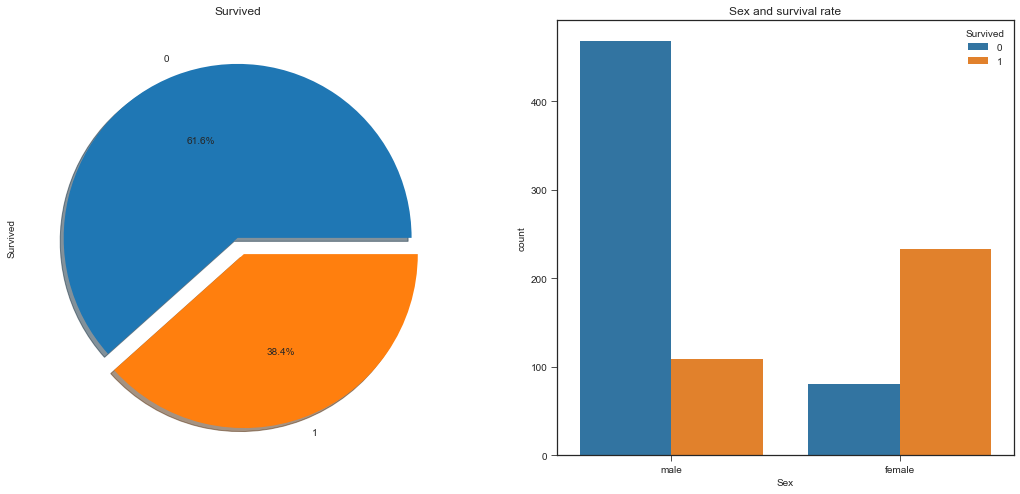

In [126]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Survived')

sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex and survival rate')

plt.show()

average age on board: : 30.0


Text(0.5, 1.0, 'Age on Titanic')

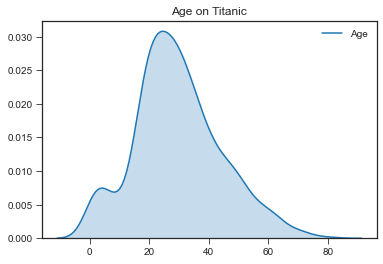

In [127]:
print("average age on board: :", np.round(df['Age'].mean(),0))
sns.kdeplot(data=df['Age'], shade=True)
plt.title("Age on Titanic")

Text(0.5, 1.0, 'Age and survived')

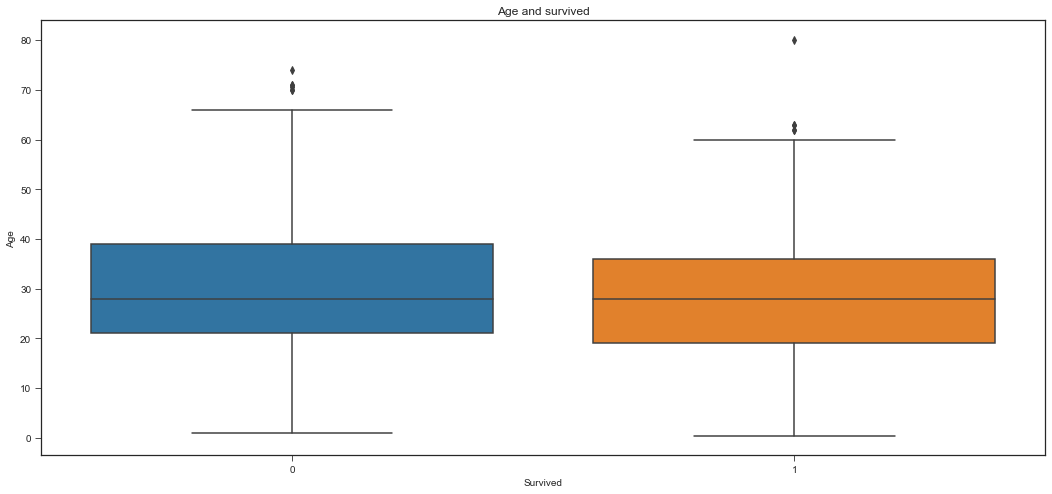

In [130]:
fig, axs = plt.subplots(figsize=(18,8))
sns.boxplot(x='Survived', y='Age', data=df)

plt.title("Age and survived")

The average age of the survivors and non-survivors is comparable. 


In [135]:
df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

50% of survivors are younger than non-survivors. More elderly people were in the group of the deceased. On the other hand, youth and being a young child did not guarantee survival.